In [24]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Importing the data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.drop("SalePrice", axis=1)
mean = train.mean()
std = train.std()

# 
train = (train - mean) / std
test = (test - mean.drop("SalePrice")) / std.drop("SalePrice")

In [26]:
# Initialising variables and lists
m = np.zeros(len(train.columns)-1)
b = 0
L = 0.0001
cmse = 0
epochs = 1100 # epoch signifies number of iterations to reduce the error and make the function more accurate
msefunc = [0 for x in range(epochs)] # initialised list to store MSE values over different epochs

# Gradient Descent function
def gradient_descent(m_now, b_now, points, L):
    m_gradient = np.zeros(len(m_now))
    b_gradient = 0
    mse = 0
    cmse = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i][: -1].values
        y = points.iloc[i].SalePrice
        y_pred = np.dot(m_now,x) + b_now
        mse += (y_pred - y) ** 2
        cmse = (mse * std.SalePrice + mean.SalePrice)
        m_gradient += (-(2/n)) * x * (y - (m_now * x + b_now))
        b_gradient += (-(2/n)) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    cmse /= n
    temp=pd.Series(cmse)
    return m, b, temp[0]

# Calling the Gradient Descent function
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, train, L)
    msefunc[i] = cmse # appending values of MSE to a function to plot it to a graph later

Epoch: 0
MSE: 0
Epoch: 50
MSE: 74204.53384177202
Epoch: 100
MSE: 68685.52217099586
Epoch: 150
MSE: 63524.75545266374
Epoch: 200
MSE: 58712.66911842774
Epoch: 250
MSE: 54239.91246887795
Epoch: 300
MSE: 50097.34419704026
Epoch: 350
MSE: 46276.0280028817
Epoch: 400
MSE: 42767.22829699921
Epoch: 450
MSE: 39562.405991702755
Epoch: 500
MSE: 36653.21437774116
Epoch: 550
MSE: 34031.49508494992
Epoch: 600
MSE: 31689.274125140793
Epoch: 650
MSE: 29618.75801557913
Epoch: 700
MSE: 27812.32998143446
Epoch: 750
MSE: 26262.54623561772
Epoch: 800
MSE: 24962.132334452683
Epoch: 850
MSE: 23903.979607656707
Epoch: 900
MSE: 23081.141661142174
Epoch: 950
MSE: 22486.830951172273
Epoch: 1000
MSE: 22114.41542844071
Epoch: 1050
MSE: 21957.415250668902


In [27]:
# Printing the values of m-gradient and b-gradient
print (f"M-gradient: {m}")
print (f"B-gradient: {b}")


[0.15537683 0.13970329 0.12702818 0.12694336 0.12008748 0.11910768
 0.11060037 0.10468744 0.10377671 0.09823225] [ 2.64921904e-17  2.98876490e-17  2.95595701e-17  3.14443621e-17
  2.84972007e-17  3.34080833e-17  2.94384224e-17  3.05623333e-17
  1.78385715e-17 -2.45841474e-17]


Linear Regression function for multiple parameters represented as a line:


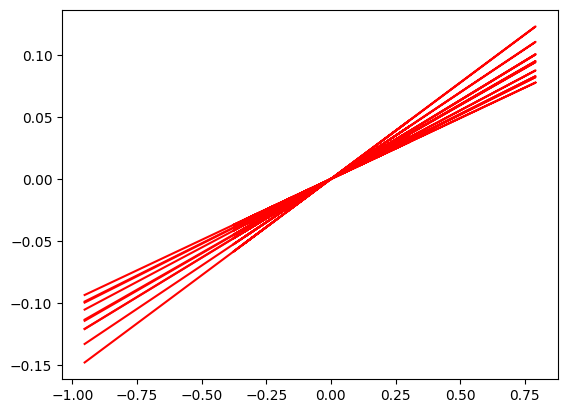

In [28]:
print("Linear Regression function for multiple parameters represented as a line:")
plt.plot (train.iloc[i][: -1].values, [np.dot(m, x) + b for x in train.iloc[i][: -1].values], color="red")
plt.show()


Graph to represent the variation of Mean Squared Error (MSE) over multiple Epochs: 



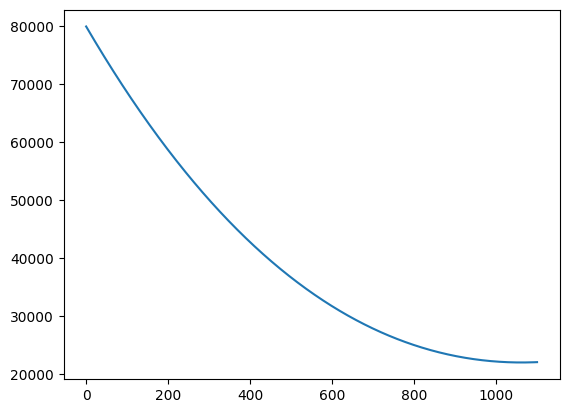


 Mean Squared Error: 22009.499562344572


In [29]:
prediction = [np.dot(m,x) + b for x in test.values]
real = test.iloc[:, -1].values
plt.plot(range(epochs), msefunc)
print("Graph to represent the variation of Mean Squared Error (MSE) over multiple Epochs: \n")
plt.show()
print (f"\n Mean Squared Error: {cmse}")